<a href="https://colab.research.google.com/github/FacuNieto/Argentina_Programa_4.0/blob/master/Demo_Practica_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

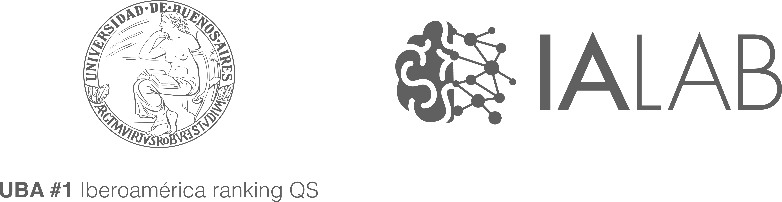

# 1 Juguete no tan juguete

Una pequeña farmacéutica produce una nueva y exitosa medicación cuya composición se basa principalmente en componentes de origen vegetal. 
Debido al aumento de ventas de este medicamento el fabricante decide mejorar el proceso para que sea más rápido y eficiente maximizando el volumen de fabricación. El área de procesos determinó que uno de los cuellos de botella se encuentra en la clasificación humana de los componentes vegetales debido a que las plantas utilizadas tienen características visuales muy similares, y deben ser clasificadas por un empleado experimentado.

Los componentes vegetales consisten de 3 tipos de flores diferentes:

El área de investigación y desarrollo desarrolló un sistema de visión artificial capaz de calcular:


*  El largo y el ancho del pétalo.
*  El largo y el ancho del sépalo.





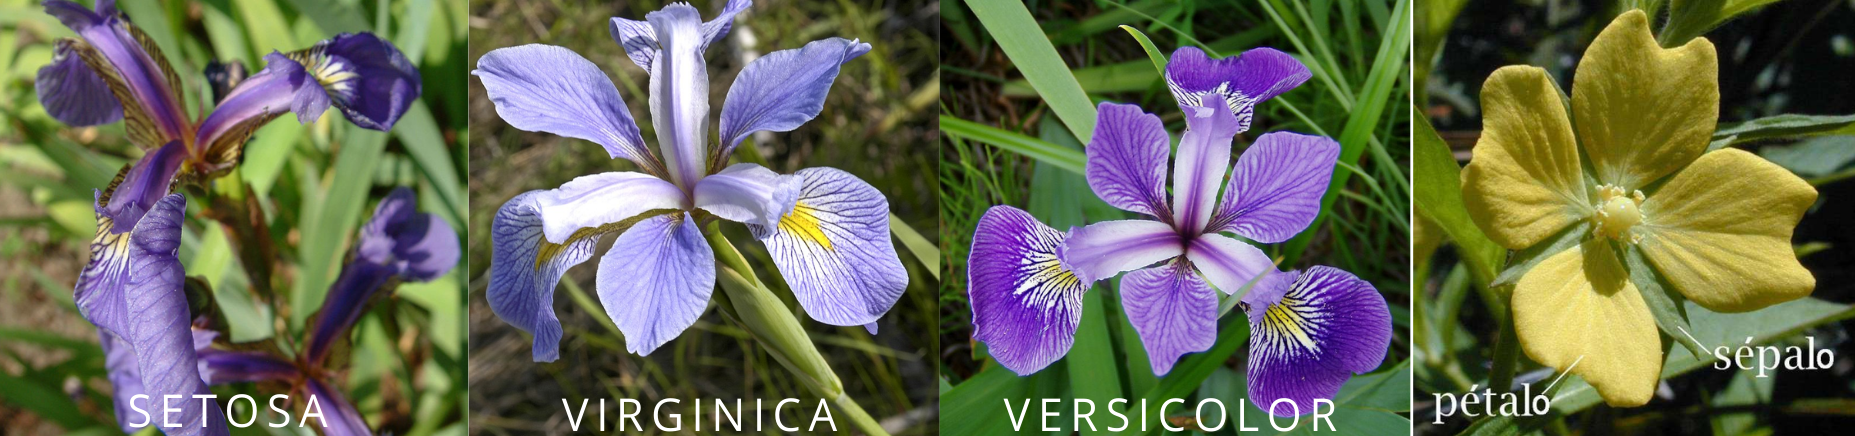

## 1.1 Carga de librerías

In [ ]:
#importamos librerias numpy, pandas y matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#importamos base de datos
from sklearn.datasets import load_iris

#importamos algoritmo arbol de decision y la herramienta para plotear el arbol
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report

## 1.2 Carga, analisis y visualización de dataset.

In [ ]:
#cargamos el dataset
iris = load_iris()

In [ ]:
#Visualizamos en un dataframe
iris_df= pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
display(iris_df)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
#Concatenamos la informacion de data con target
iris_df_c=pd.DataFrame(data= np.c_[iris.data , iris.target], columns= iris['feature_names'] + ['target'])
display(iris_df_c)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [ ]:
iris_df_c.info() # verificar nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Visualización

In [ ]:
target_n = []
for i in range(len(iris['target'])):
  target_n.append(iris['target_names'][iris['target'][i]])

In [ ]:
iris_df_graph = iris_df_c.copy()

In [ ]:
iris_df_graph['target_graph'] = pd.DataFrame(target_n)

In [ ]:
iris_df_graph = iris_df_graph.drop('target', axis=1)

In [ ]:
iris_df_graph 

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    target_graph  
0         setosa  
1         setosa  
2         setosa  
3         setosa  
4         setosa  
..           ...  
145    virginica  
146    virginica  
147    virginica  
148    virginica  
149    virginica  

[150 rows x 5 columns]

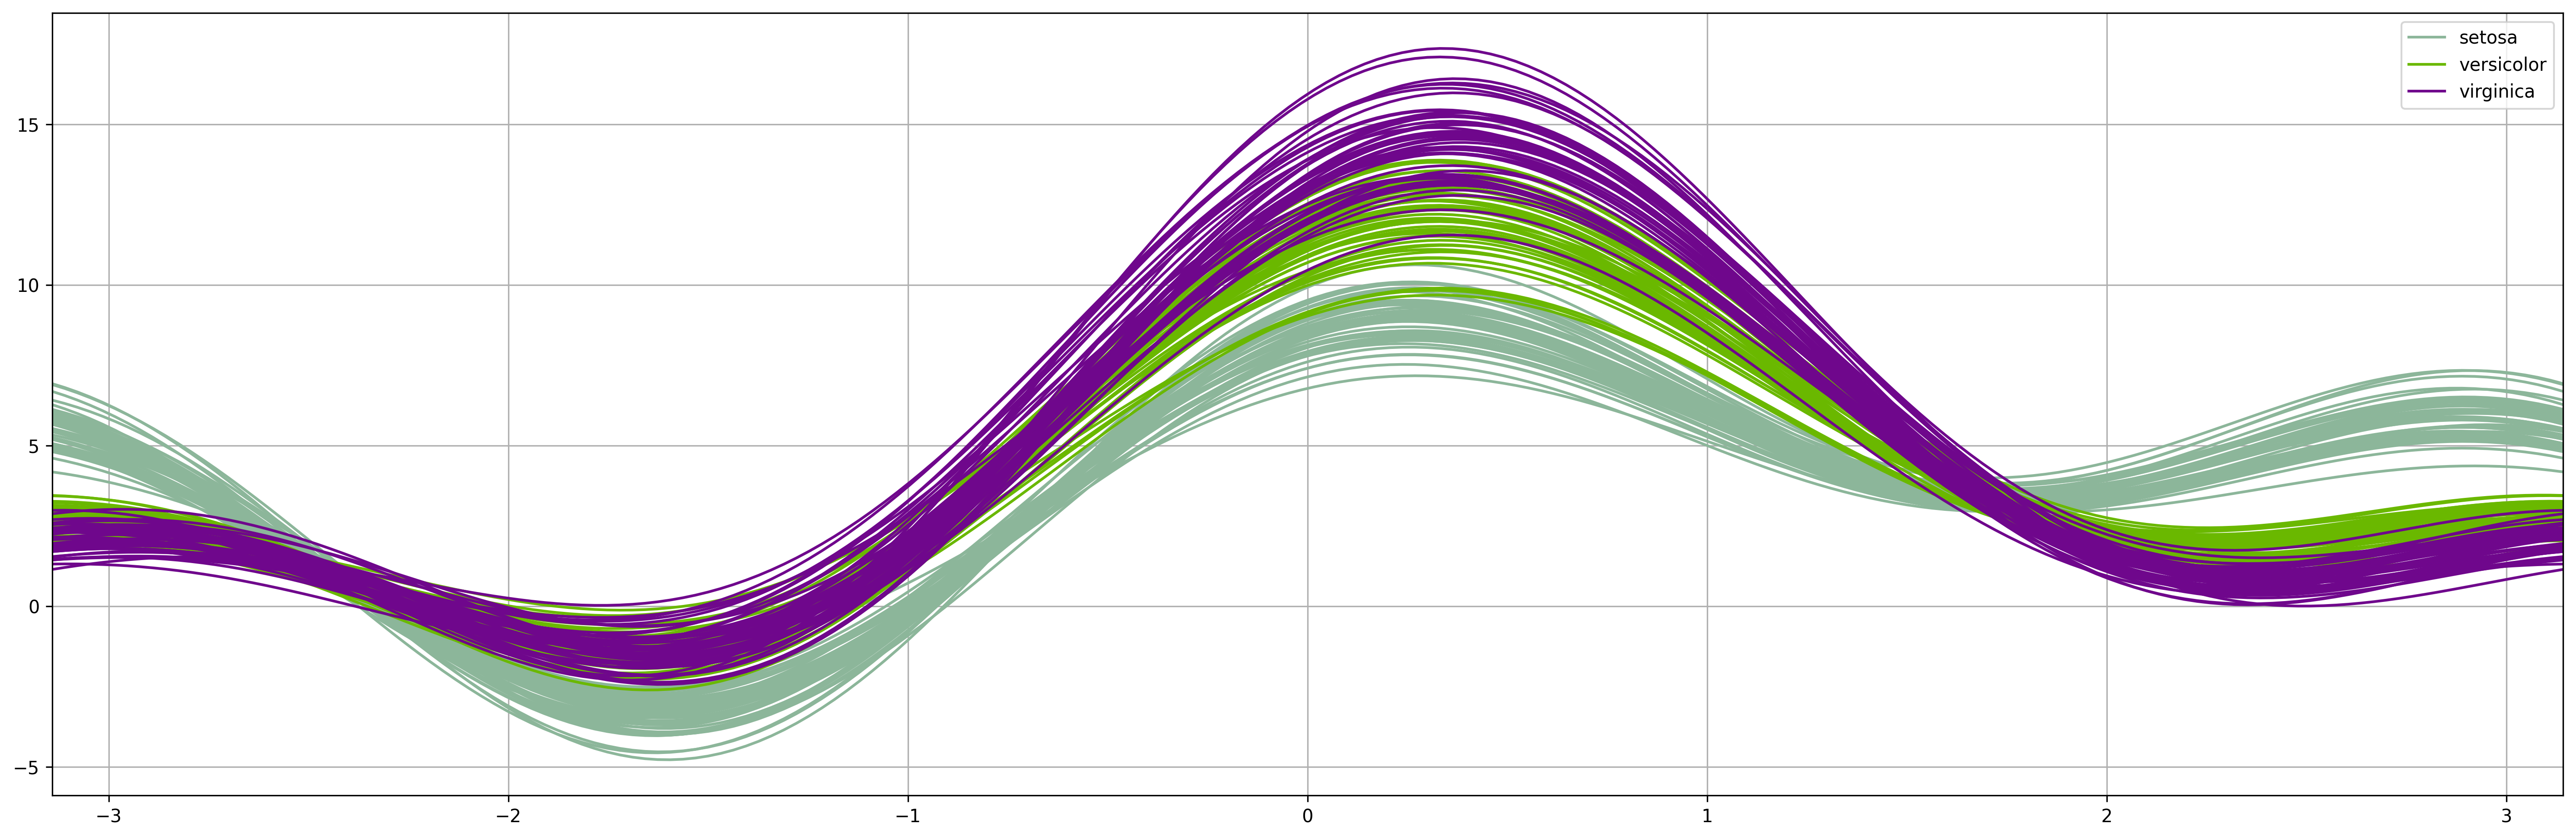

In [ ]:
#Generamos un andrews plot
fig = plt.figure(figsize = (25, 8))
pd.plotting.andrews_curves(iris_df_graph,'target_graph')
plt.show()

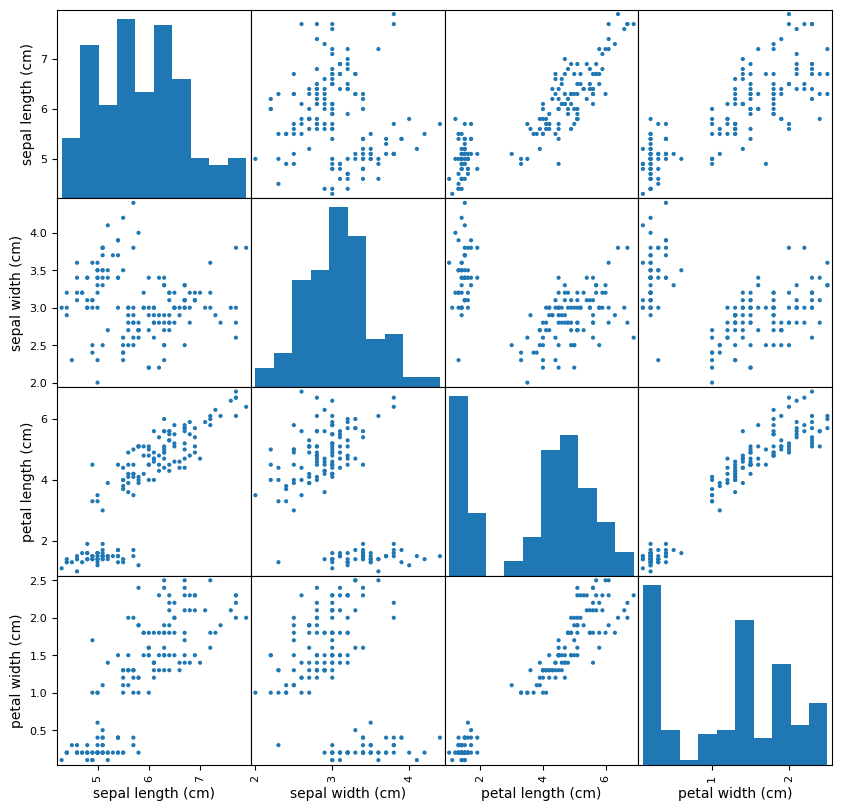

In [ ]:
plt.rcParams["figure.dpi"] = 100
pd.plotting.scatter_matrix(iris_df_graph, alpha=1, figsize = (10,10))
plt.show()

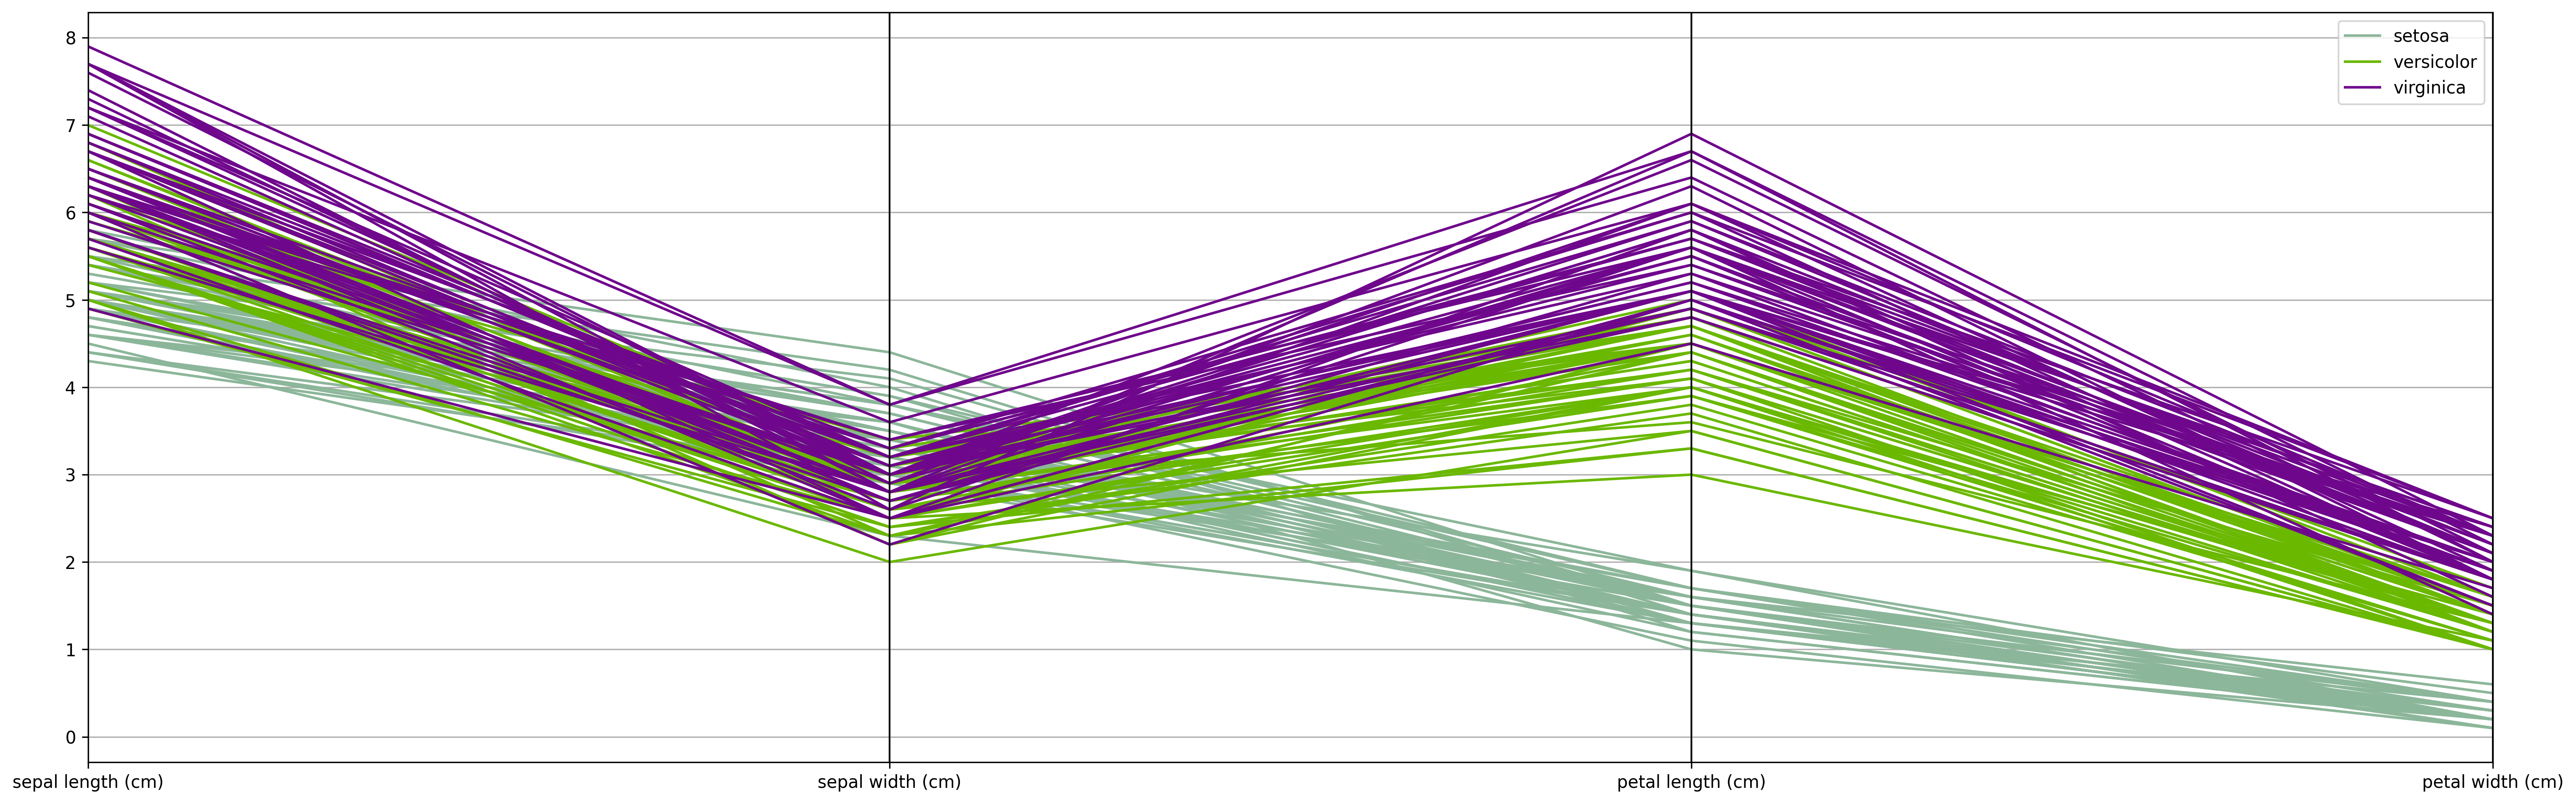

In [ ]:
#Generamos un grafico de coordenadas paralelas.
fig = plt.figure(figsize = (25, 8))
pd.plotting.parallel_coordinates(iris_df_graph,'target_graph')
plt.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(iris_df_c, color='target',
                              dimensions=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

## 1.3 Generación de datos de entrenamiento y prueba

In [ ]:
#dividiremos el dataset en datos de entrenamiento y de prueba

x= iris_df_c.drop('target', axis = 1)
y= iris_df_c['target']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=10)

## 1.4 Carga y entrenamiento de modelo 

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# Hacemos la prediccion:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9736842105263158
precision=  0.9791666666666666


In [ ]:
# Graficamos Arbol de decision.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, class_names = iris.target_names, feature_names = iris.feature_names)
# plt.savefig('arbol.png')
plt.show()

In [ ]:
#Metricas varias
print(classification_report(y_test, y_pred, target_names=iris.target_names))
plt.show()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



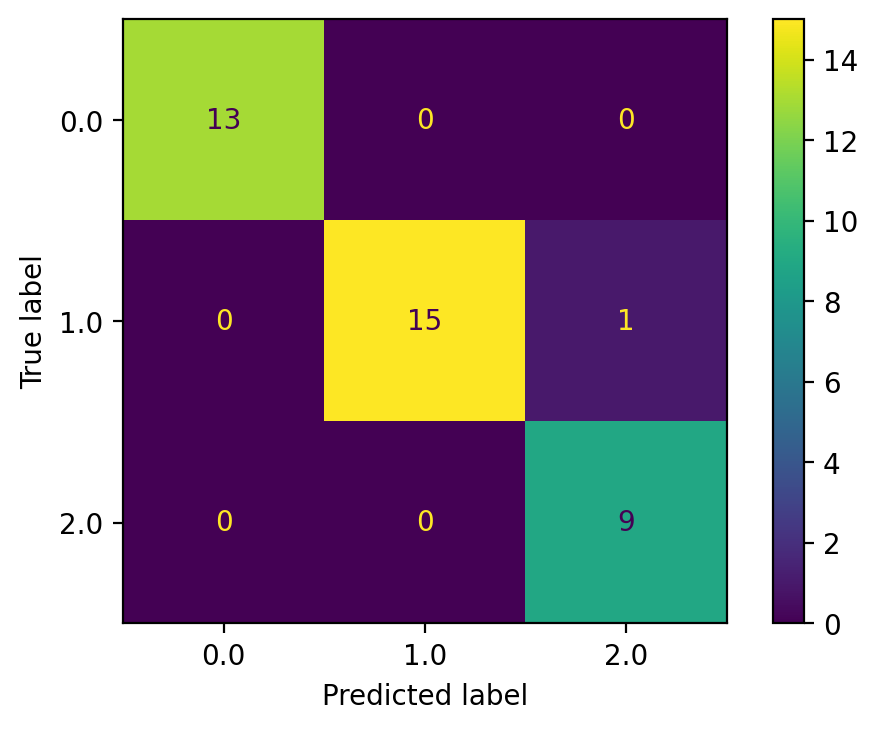

In [ ]:
#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred)
plt.rcParams["figure.dpi"] = 200
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=clf.classes_)
disp.plot() 
plt.show()

# 2 Ejemplo academico

# 3 Furvoooooooooo

## 3.1 Clonamos repositorio y leemos dataset

In [ ]:
!git clone https://github.com/FacuNieto/Argentina_Programa_4.0.git

fatal: destination path 'Argentina_Programa_4.0' already exists and is not an empty directory.


In [ ]:
df_messi = pd.read_csv('Argentina_Programa_4.0/df_messi_DTC.csv')

In [ ]:
df_messi

Season            Competition     Matchday      Date Venue  \
0    04/05                 LaLiga           34  05-01/05     H   
1    05/06  UEFA Champions League  Group Stage  11-02/05     H   
2    05/06                 LaLiga           13  11/27/05     H   
3    05/06                 LaLiga           19   1/15/06     H   
4    05/06                 LaLiga           20   1/22/06     H   
..     ...                    ...          ...       ...   ...   
692  22/23                Ligue 1            9   10/1/22     H   
693  22/23  UEFA Champions League  Group Stage   10/5/22     A   
694  22/23                Ligue 1           12  10/21/22     A   
695  22/23  UEFA Champions League  Group Stage  10/25/22     H   
696  22/23  UEFA Champions League  Group Stage  10/25/22     H   

                    Club              Opponent Result Playing_Position  \
0           FC Barcelona     Albacete Balompie   2:00               CF   
1           FC Barcelona  Panathinaikos Athens   5:00               RW   
2           FC Barcelona      Racing Santander   4:01               RW   
3           FC Barcelona       Athletic Bilbao   2:01               RW   
4           FC Barcelona      Deportivo Alaves   2:00               CF   
..                   ...                   ...    ...              ...   
692  Paris Saint-Germain              OGC Nice    2:1               AM   
693  Paris Saint-Germain            SL Benfica    1:1               AM   
694  Paris Saint-Germain            AC Ajaccio    0:3               CF   
695  Paris Saint-Germain         Maccabi Haifa    7:2               SS   
696  Paris Saint-Germain         Maccabi Haifa    7:2               SS   

     Minute At_score              Type        Goal_assist  Minute_decenas  \
0        90     2:00  Left-footed shot  Ronaldinho Gaacho              90   
1        34     3:00  Left-footed shot                NaN              30   
2        51     2:00  Left-footed shot        Samuel Etoo              50   
3        50     2:01  Left-footed shot    Mark van Bommel              50   
4        82     2:00  Left-footed shot  Ronaldinho Gaacho              80   
..      ...      ...               ...                ...             ...   
692      28      1:0  Direct free kick                NaN              20   
693      22      0:1  Left-footed shot             Neymar              20   
694      78      0:2  Left-footed shot      Kylian Mbapp�              70   
695      19      1:0  Left-footed shot      Kylian Mbapp�              10   
696      44      4:1  Left-footed shot      Kylian Mbapp�              40   

     primer_tiempo  segundo_tiempo  
0            False            True  
1             True           False  
2            False            True  
3            False            True  
4            False            True  
..             ...             ...  
692           True           False  
693           True           False  
694          False            True  
695           True           False  
696           True           False  

[697 rows x 16 columns]

## 3.2 Limpieza

### 3.2.1 Arreglamos la fecha!

In [ ]:
# Es posible notar que eventualmente se ha escrito la fecha separada por '-', por lo que reemplazamos por '/'
df_messi["Date"] = df_messi["Date"].str.replace("-", "/")

In [ ]:
# Separamos cada fecha segun '/' y almacenamos la lista en una lista llamada time_data
time_data = [f.split('/') for f in df_messi['Date']]

In [ ]:
# Convertimos en un dataframe
time_data_df = pd.DataFrame(time_data)

In [ ]:
# Le damos nombre a las nuevas columnas
time_data_df.columns = ['Mes', 'Día', 'Año'] 

In [ ]:
# Asignamos las nuevas columnas al dataset general "df_messi"
df_messi['Día'] = time_data_df['Día'].astype(int)
df_messi['Mes'] = time_data_df['Mes'].astype(int)
df_messi['Año'] = time_data_df['Año'].astype(int)

### 3.2.2 Reducimos cantidad de tipos de goles

In [ ]:
# Convertimos el tipo de gol en "penal/tirolibre" y "en juego"
df_messi['Type'].value_counts()

Left-footed shot          432
Penalty                    84
Right-footed shot          83
Direct free kick           51
Header                     24
Tap-in                      9
Solo run                    4
Penalty rebound             3
Deflected shot on goal      2
Counter attack goal         1
Chest                       1
Long distance kick          1
Right-footed shot,          1
Name: Type, dtype: int64

In [ ]:
# simplemente almacenamos la información del tipo de gol, segun el criterio antes mencionado, y lo asignamos a la variable que le corresponde
penal_tlibre = []
en_juego = []

for valor in df_messi['Type']:
  if valor != 'Penalty' and valor != 'Direct free kick':
     penal_tlibre.append(False)
     en_juego.append(True)
  else:
     penal_tlibre.append(True)
     en_juego.append(False)

In [ ]:
# Convertimos en dataframe y asociamos a la base de datos general
df_messi['penal_tlibre'] = pd.DataFrame(penal_tlibre)
df_messi['en_juego'] = pd.DataFrame(en_juego)

### 3.2.2 Generamos columna de victoria

In [ ]:
# Generamos nueva columna con el resultado final (gana o pierde)
df_messi["Result"] = df_messi["Result"].str.replace(" AET", "")

In [ ]:
# Separamos cada dato segun ":" y almacenamos las listas resultantes en la lista "result_data"
result_data = [f.split(':') for f in df_messi['Result']]

In [ ]:
for i, val in enumerate(result_data):
  if df_messi['Venue'][i] == 'A':
    val.reverse()

In [ ]:
# Convertimos en dataframe y asociamos a dataset general
result_data_df = pd.DataFrame(result_data)
result_data_df.columns = ['Result_fav', 'Result_contra']
df_messi['Result_fav'] = result_data_df['Result_fav'].astype(int)
df_messi['Result_contra'] = result_data_df['Result_contra'].astype(int)

In [ ]:
# Generamos la columna "victoria" basados en la condición de que haya mayor cantidad de goles favorables que en contra
df_messi['victoria'] =  df_messi['Result_fav'] > df_messi['Result_contra']

### 3.2.3 Arreglamos posición

In [ ]:
# La posición tiene problemas, se ve claramente que algunos valores tienen un espacio asociado 
df_messi['Playing_Position'].value_counts()

CF     273
RW     220
RW      95
CF      40
SS      32
SS      21
AM       8
AM       7
LW       1
Name: Playing_Position, dtype: int64

In [ ]:
# Solucionar posición
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace(" ", "")
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace("AM", "SS")
df_messi['Playing_Position'] = df_messi["Playing_Position"].str.replace("LW", "SS")
df_messi['Playing_Position'].value_counts()

RW    315
CF    313
SS     69
Name: Playing_Position, dtype: int64

### 3.2.4 Generamos columnas con resultados luego del gol

In [ ]:
# Resultado luego de realizar el gol en el primer tiempo
result_gol_data = [f.split(':') for f in df_messi['At_score']]

In [ ]:
for indx, val2 in enumerate(result_gol_data):
  if df_messi['Venue'][indx] == 'A':
    val2.reverse()

In [ ]:
# Convertimos en un dataframe
result_gol_data_df = pd.DataFrame(result_gol_data)

In [ ]:
# Nombramos las columnas y asociamos al dataset general convirtiendo los valores a enteros!
result_gol_data_df.columns = ['Result_fav_gol', 'Result_contra_gol']
df_messi['Result_fav_gol'] = result_gol_data_df['Result_fav_gol'].astype(int)
df_messi['Result_contra_gol'] = result_gol_data_df['Result_contra_gol'].astype(int)

### 3.2.5 Encoding de variables 

In [ ]:
# hacemos one hot encoding para Venue y Playing_Position

messi_df_4encod= df_messi.drop(['Season', 'Competition', 'Matchday', 'Date', 'Club',
       'Opponent', 'Result', 'Minute', 'At_score', 'Type',
       'Goal_assist', 'Minute_decenas', 'primer_tiempo', 'segundo_tiempo',
       'Día', 'Mes', 'Año', 'penal_tlibre', 'en_juego', 'Result_fav',
       'Result_contra', 'victoria', 'Result_fav_gol', 'Result_contra_gol'], axis=1)
display(messi_df_4encod)
encodedVenue = pd.get_dummies(messi_df_4encod.Venue, prefix= 'Venue')
display(encodedVenue)
encodedPosition = pd.get_dummies(messi_df_4encod.Playing_Position, prefix= 'Playing_Position')
display(encodedPosition)


categorias_eval = pd.concat([encodedVenue,
                          encodedPosition], axis=1,ignore_index=False)
display(categorias_eval)

Venue Playing_Position
0       H               CF
1       H               RW
2       H               RW
3       H               RW
4       H               CF
..    ...              ...
692     H               SS
693     A               SS
694     A               CF
695     H               SS
696     H               SS

[697 rows x 2 columns]

Venue_A  Venue_H
0          0        1
1          0        1
2          0        1
3          0        1
4          0        1
..       ...      ...
692        0        1
693        1        0
694        1        0
695        0        1
696        0        1

[697 rows x 2 columns]

Playing_Position_CF  Playing_Position_RW  Playing_Position_SS
0                      1                    0                    0
1                      0                    1                    0
2                      0                    1                    0
3                      0                    1                    0
4                      1                    0                    0
..                   ...                  ...                  ...
692                    0                    0                    1
693                    0                    0                    1
694                    1                    0                    0
695                    0                    0                    1
696                    0                    0                    1

[697 rows x 3 columns]

Venue_A  Venue_H  Playing_Position_CF  Playing_Position_RW  \
0          0        1                    1                    0   
1          0        1                    0                    1   
2          0        1                    0                    1   
3          0        1                    0                    1   
4          0        1                    1                    0   
..       ...      ...                  ...                  ...   
692        0        1                    0                    0   
693        1        0                    0                    0   
694        1        0                    1                    0   
695        0        1                    0                    0   
696        0        1                    0                    0   

     Playing_Position_SS  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
692                    1  
693                    1  
694                    0  
695                    1  
696                    1  

[697 rows x 5 columns]

In [ ]:
df_messi = pd.concat([df_messi, categorias_eval], axis=1,ignore_index=False)
display(df_messi)

Season            Competition     Matchday      Date Venue  \
0    04/05                 LaLiga           34  05/01/05     H   
1    05/06  UEFA Champions League  Group Stage  11/02/05     H   
2    05/06                 LaLiga           13  11/27/05     H   
3    05/06                 LaLiga           19   1/15/06     H   
4    05/06                 LaLiga           20   1/22/06     H   
..     ...                    ...          ...       ...   ...   
692  22/23                Ligue 1            9   10/1/22     H   
693  22/23  UEFA Champions League  Group Stage   10/5/22     A   
694  22/23                Ligue 1           12  10/21/22     A   
695  22/23  UEFA Champions League  Group Stage  10/25/22     H   
696  22/23  UEFA Champions League  Group Stage  10/25/22     H   

                    Club              Opponent Result Playing_Position  \
0           FC Barcelona     Albacete Balompie   2:00               CF   
1           FC Barcelona  Panathinaikos Athens   5:00               RW   
2           FC Barcelona      Racing Santander   4:01               RW   
3           FC Barcelona       Athletic Bilbao   2:01               RW   
4           FC Barcelona      Deportivo Alaves   2:00               CF   
..                   ...                   ...    ...              ...   
692  Paris Saint-Germain              OGC Nice    2:1               SS   
693  Paris Saint-Germain            SL Benfica    1:1               SS   
694  Paris Saint-Germain            AC Ajaccio    0:3               CF   
695  Paris Saint-Germain         Maccabi Haifa    7:2               SS   
696  Paris Saint-Germain         Maccabi Haifa    7:2               SS   

     Minute  ... Result_fav Result_contra victoria  Result_fav_gol  \
0        90  ...          2             0     True               2   
1        34  ...          5             0     True               3   
2        51  ...          4             1     True               2   
3        50  ...          2             1     True               2   
4        82  ...          2             0     True               2   
..      ...  ...        ...           ...      ...             ...   
692      28  ...          2             1     True               1   
693      22  ...          1             1    False               1   
694      78  ...          3             0     True               2   
695      19  ...          7             2     True               1   
696      44  ...          7             2     True               4   

     Result_contra_gol  Venue_A  Venue_H  Playing_Position_CF  \
0                    0        0        1                    1   
1                    0        0        1                    0   
2                    0        0        1                    0   
3                    1        0        1                    0   
4                    0        0        1                    1   
..                 ...      ...      ...                  ...   
692                  0        0        1                    0   
693                  0        1        0                    0   
694                  0        1        0                    1   
695                  0        0        1                    0   
696                  1        0        1                    0   

     Playing_Position_RW  Playing_Position_SS  
0                      0                    0  
1                      1                    0  
2                      1                    0  
3                      1                    0  
4                      0                    0  
..                   ...                  ...  
692                    0                    1  
693                    0                    1  
694                    0                    0  
695                    0                    1  
696                    0                    1  

[697 rows x 31 columns]

In [ ]:
df_messi['penal_tlibre'] = df_messi['penal_tlibre'].astype(int)
df_messi['en_juego'] = df_messi['en_juego'].astype(int)
# df_messi['victoria'] = df_messi['victoria'].astype(int)
df_messi['primer_tiempo'] = df_messi['primer_tiempo'].astype(int)
df_messi['segundo_tiempo'] = df_messi['segundo_tiempo'].astype(int)

In [ ]:
# Guardamos el dataset "completo"
df_messi.to_csv('df_messi_completo.csv', index=False)

### 3.2.6 Eliminamos todos los goles del segundo tiempo

In [ ]:
# Eliminamos todos goles del segundo tiempo! 
df_messi = df_messi.drop(df_messi[df_messi['primer_tiempo'] == False].index)

### 3.2.7 Limpiar columnas

In [ ]:
# Eliminamos columnas
df_messi = df_messi.drop(columns = ['Competition', 'Season', 'Matchday', 'Date', 'Goal_assist', 'primer_tiempo', 
                                    'segundo_tiempo', 'Result', 'Type', 'Result_fav', 'Result_contra', 'Club', 'Opponent', 'At_score', 'Venue' , 'Playing_Position', 'Año'])


In [ ]:
# veamos el dataset que usaremos para crear el modelo
display(df_messi)

# Guardamos el dataset
df_messi.to_csv('df_messi_Arbol.csv', index=False)

Minute  Minute_decenas  Día  Mes  penal_tlibre  en_juego  victoria  \
1        34              30    2   11             0         1      True   
7        42              40    1    2             0         1      True   
10       36              30    9    9             0         1      True   
13       11              10   10    3             0         1     False   
14       28              20   10    3             0         1     False   
..      ...             ...  ...  ...           ...       ...       ...   
691       5               0   18    9             0         1      True   
692      28              20    1   10             1         0      True   
693      22              20    5   10             0         1     False   
695      19              10   25   10             0         1      True   
696      44              40   25   10             0         1      True   

     Result_fav_gol  Result_contra_gol  Venue_A  Venue_H  Playing_Position_CF  \
1                 3                  0        0        1                    0   
7                 1                  0        0        1                    1   
10                3                  0        0        1                    0   
13                1                  1        0        1                    0   
14                2                  2        0        1                    0   
..              ...                ...      ...      ...                  ...   
691               1                  0        1        0                    0   
692               1                  0        0        1                    0   
693               1                  0        1        0                    0   
695               1                  0        0        1                    0   
696               4                  1        0        1                    0   

     Playing_Position_RW  Playing_Position_SS  
1                      1                    0  
7                      0                    0  
10                     1                    0  
13                     1                    0  
14                     1                    0  
..                   ...                  ...  
691                    0                    1  
692                    0                    1  
693                    0                    1  
695                    0                    1  
696                    0                    1  

[308 rows x 14 columns]

In [ ]:
df_messi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 1 to 696
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Minute               308 non-null    int64
 1   Minute_decenas       308 non-null    int64
 2   Día                  308 non-null    int64
 3   Mes                  308 non-null    int64
 4   penal_tlibre         308 non-null    int64
 5   en_juego             308 non-null    int64
 6   victoria             308 non-null    bool 
 7   Result_fav_gol       308 non-null    int64
 8   Result_contra_gol    308 non-null    int64
 9   Venue_A              308 non-null    uint8
 10  Venue_H              308 non-null    uint8
 11  Playing_Position_CF  308 non-null    uint8
 12  Playing_Position_RW  308 non-null    uint8
 13  Playing_Position_SS  308 non-null    uint8
dtypes: bool(1), int64(8), uint8(5)
memory usage: 23.5 KB


In [ ]:
df_messi['victoria'].value_counts()

True     264
False     44
Name: victoria, dtype: int64

https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris dataset iris


## 3.3 Creación de modelo



In [ ]:
#dividiremos el dataset en datos de entrenamiento y de prueba

x = df_messi.drop('victoria', axis = 1)
y = df_messi['victoria']
# y = m.fit_transform(df_messi['victoria'])

x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=10)

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6).fit(x_train, y_train)

# Hacemos la prediccion:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision= ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.8181818181818182
precision=  0.5865384615384616


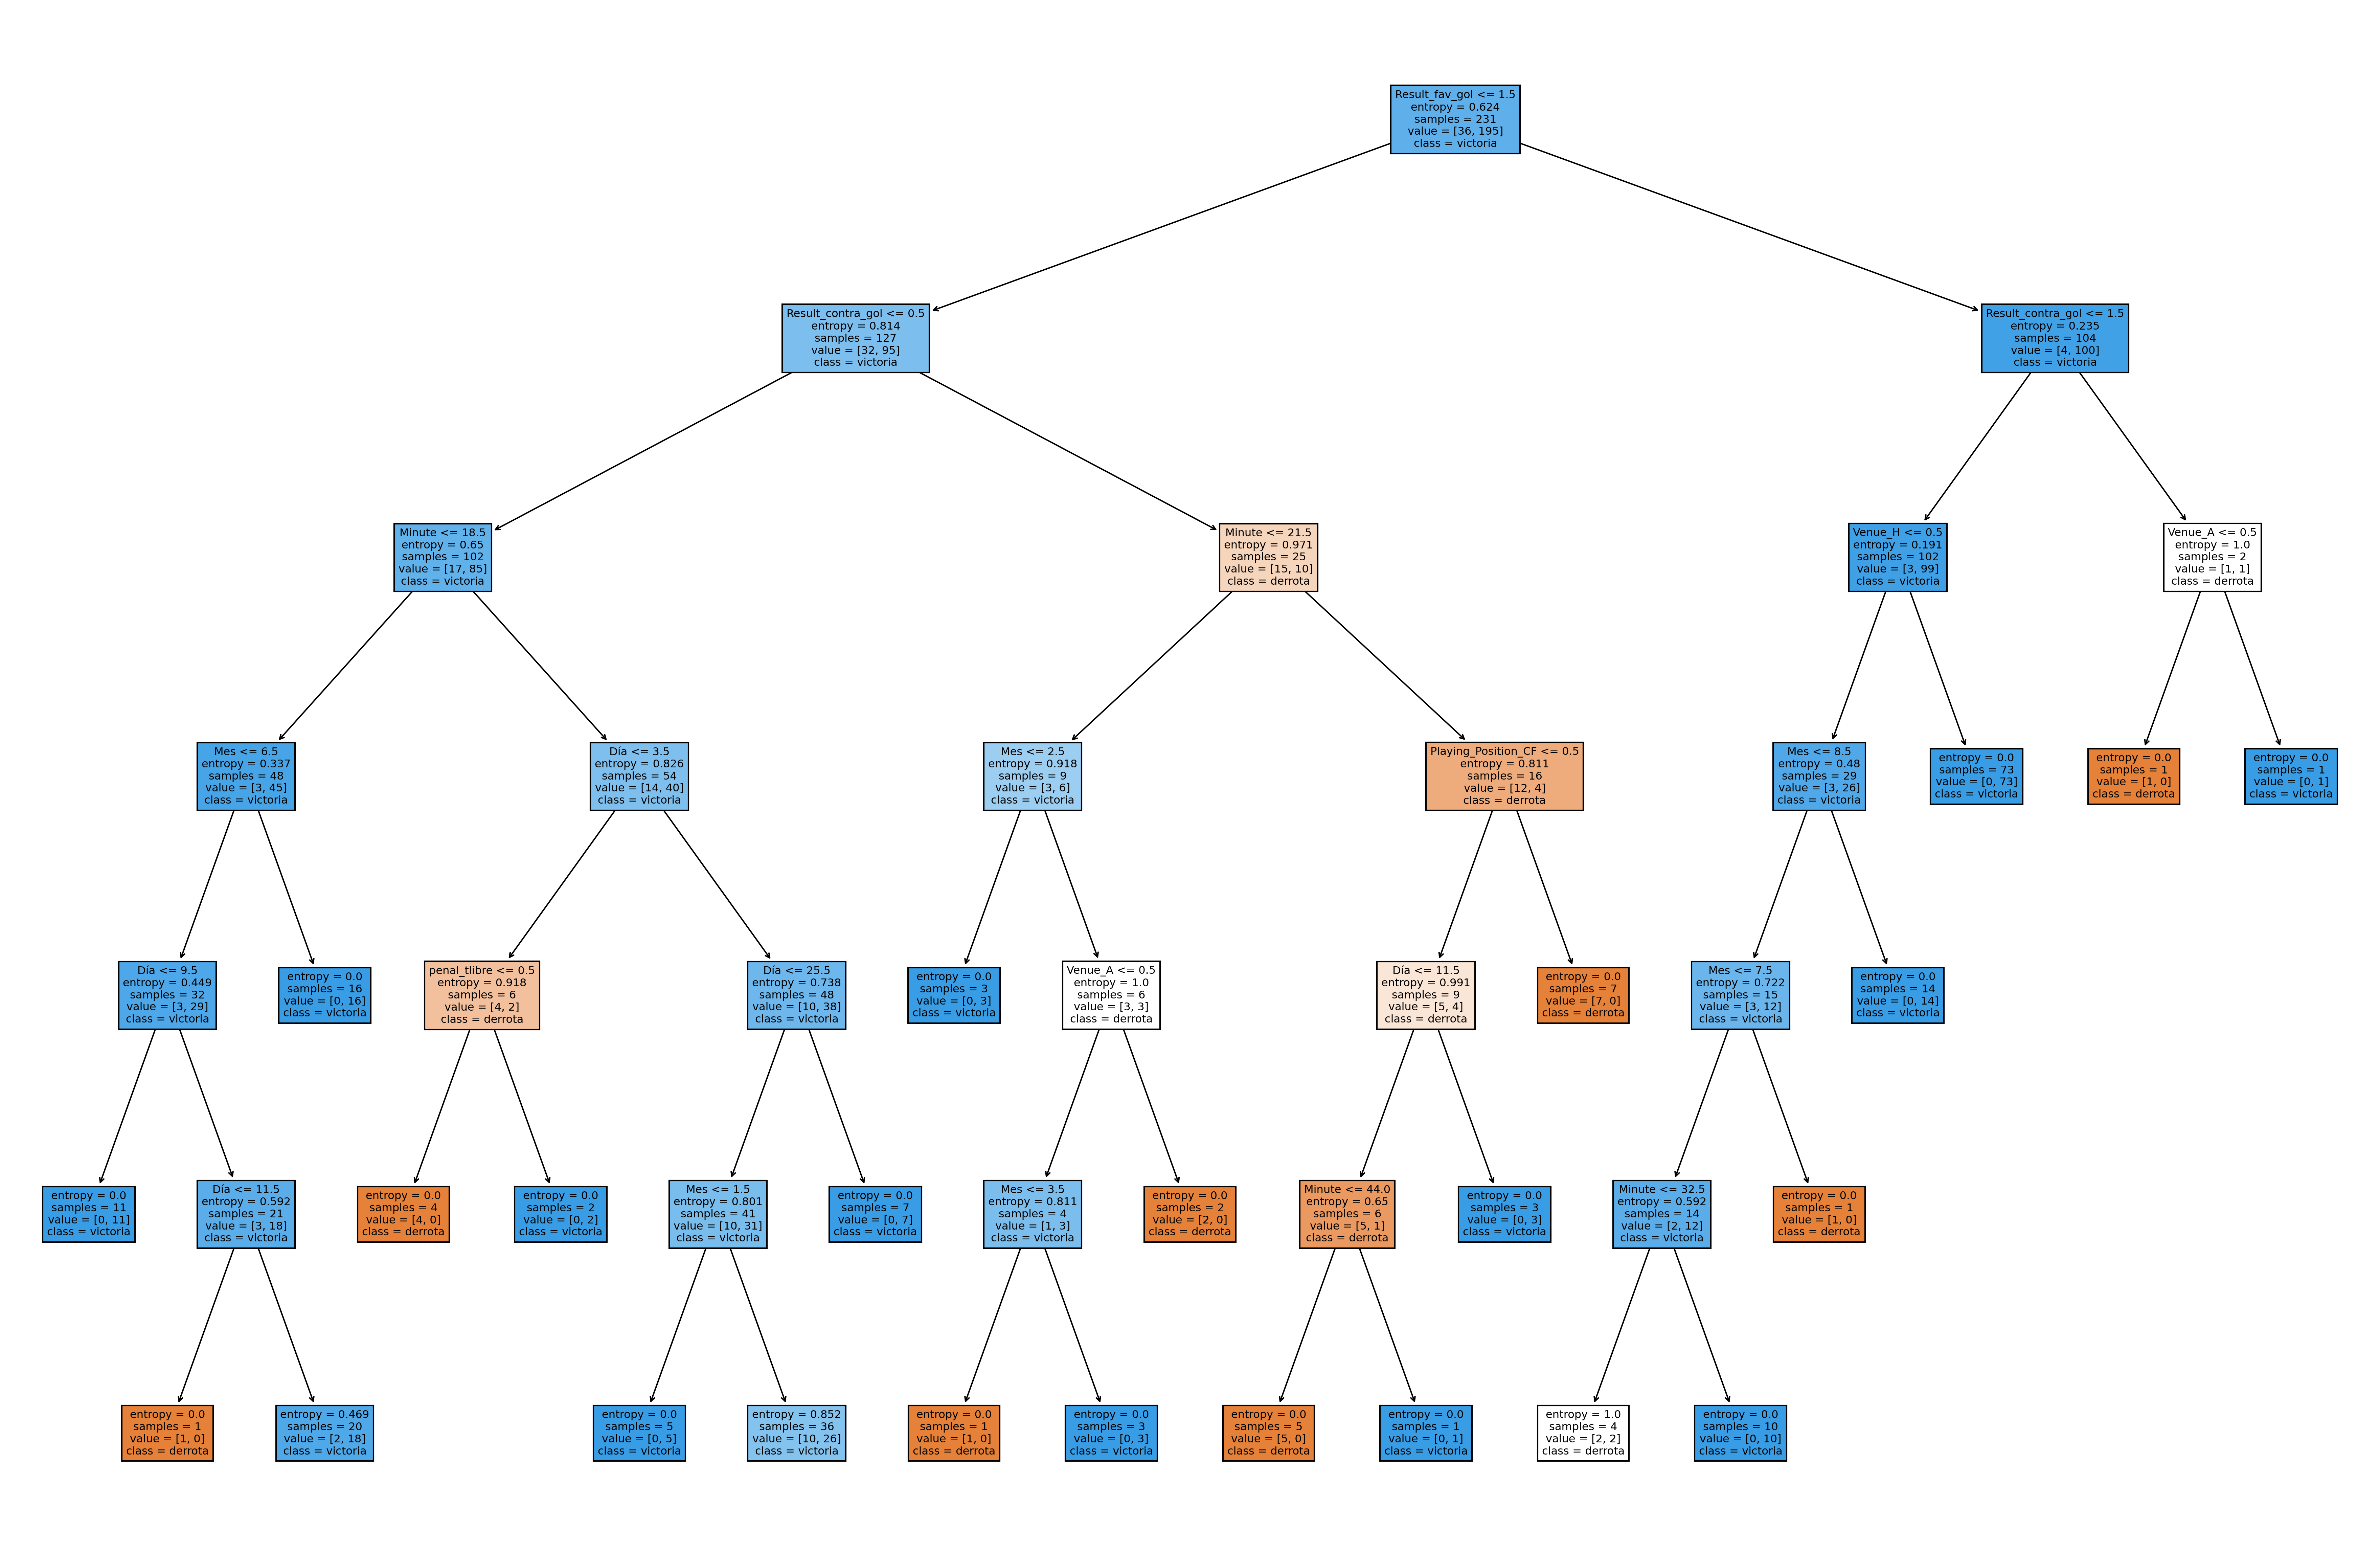

In [ ]:
# Graficamos Arbol de decision.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names = x.columns, class_names = ['derrota','victoria'])
# plt.savefig('arbol.png')
plt.show()

In [ ]:
#Metricas varias
print(classification_report(y_test, y_pred, target_names=['Derrota', 'Victoria']))
plt.show()

              precision    recall  f1-score   support

     Derrota       0.25      0.38      0.30         8
    Victoria       0.92      0.87      0.90        69

    accuracy                           0.82        77
   macro avg       0.59      0.62      0.60        77
weighted avg       0.85      0.82      0.83        77



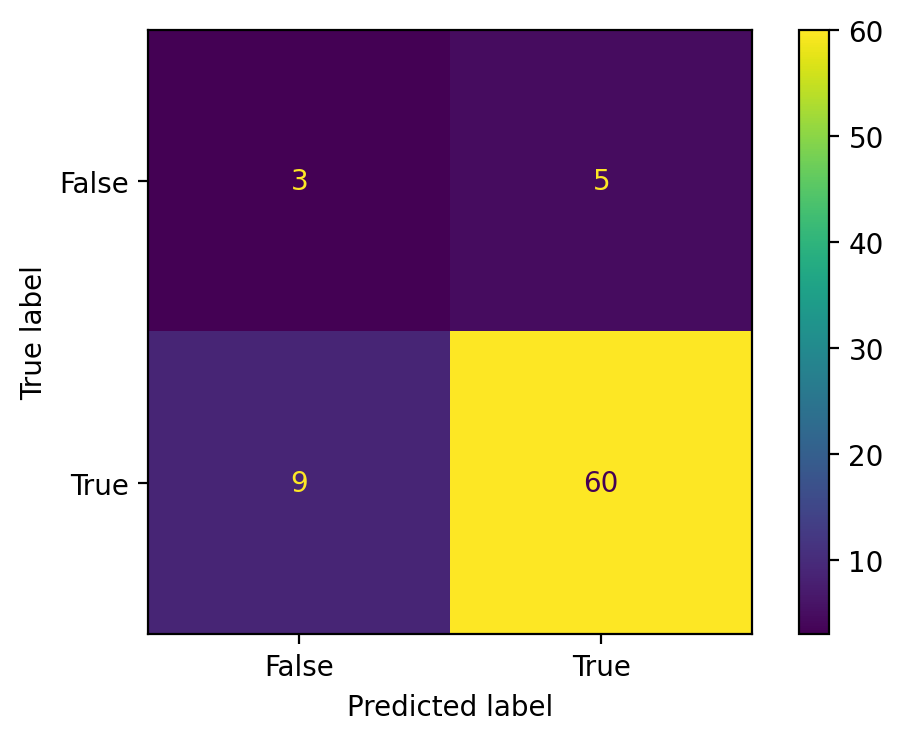

In [ ]:
#Realizamos la matriz de confusion.
matriz=confusion_matrix(y_test,y_pred)
plt.rcParams["figure.dpi"] = 200
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=clf.classes_)
disp.plot() 
plt.show()

## 3.4 Predicción de resultado

In [ ]:
#@title Calculadora de resultado
#@markdown #Calculadora de resultados
#@markdown Si usted ha visto el primer tiempo, Messi ha metido un gol, y quiere predecir el resultado del partido, por favor ingrese los siguientes datos:

#@markdown ⌛ Minuto en el que Messi hizo el ultimo gol:
minuto = 40 #@param {type:"slider", min:0, max:45, step:1}

#@markdown 📆 Día
dia = 24 #@param {type:"slider", min:1, max:30, step:1}

#@markdown 📆 Mes
mes = 7 #@param {type:"slider", min:1, max:12, step:1}

#@markdown ⚽ Tipo de gol
tipo_de_gol = "EnJuego" #@param ["Penal/TiroLibre", "EnJuego"]

#@markdown ✅ Resultado a favor luego de que Messi haga el gol 
res_a_favor = 2 #@param {type:"slider", min:1, max:15, step:1}


#@markdown ❌ Resultado en contra luego de que Messi haga el gol
res_en_contra = 2 #@param {type:"slider", min:0, max:15, step:1}


#@markdown 🏠 Visitante o local?
localidad = "Local" #@param ["Visitante", "Local"]

#@markdown 💥 En que posición esta jugando Messi?
posi = "CF" #@param ["CF", "RW", "SS"]

if tipo_de_gol == 'Penal/TiroLibre':
  penal_tlibre, en_juego = 1 , 0
else:
  penal_tlibre, en_juego = 0 , 1

if localidad == 'Visitante':
  Venue_A, Venue_H = 1 , 0
else:
  Venue_A, Venue_H = 0 , 1

if posi == "CF":
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 1, 0, 0
elif posi == "RW":
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 0, 1, 0
else:
  Playing_Position_CF, Playing_Position_RW, Playing_Position_SS = 0, 0, 1

entrada = [minuto, (minuto//10), dia, mes, penal_tlibre, en_juego, res_a_favor, res_en_contra, Venue_A, Venue_H, Playing_Position_CF, Playing_Position_RW, Playing_Position_SS  ]

entrada = pd.DataFrame(np.array(entrada).reshape(1, 13))
entrada.columns = ['Minute', 'Minute_decenas', 'Día', 'Mes', 'penal_tlibre', 'en_juego',
       'Result_fav_gol', 'Result_contra_gol', 'Venue_A', 'Venue_H',
       'Playing_Position_CF', 'Playing_Position_RW', 'Playing_Position_SS']
y_pred = clf.predict(entrada)

if y_pred == True:
  print('Victoria')
else:
  print('Derrota')

Derrota


https://scikit-learn.org/stable/datasets/toy_dataset.html 